In [137]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy.stats import sem

# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

# File to Load (Remember to Change These)
mouse_drug_data_to_load = "data/mouse_drug_data.csv"
clinical_trial_data_to_load = "data/clinicaltrial_data.csv"

# Read the Mouse and Drug Data and the Clinical Trial Data
mouse_data_df = pd.read_csv(mouse_drug_data_to_load)
clinical_trial_df = pd.read_csv(clinical_trial_data_to_load)
# Combine the data into a single dataset # Need help in merging dataset to appear similiar as sample data

combined_data_df = pd.merge(mouse_data_df, clinical_trial_df, how="outer", on="Mouse ID")

# Display the data table for preview

combined_data_df.head()

,Mouse ID,Drug,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,f234,Stelasyn,0,45.000000,0
1,f234,Stelasyn,5,47.313491,0
2,f234,Stelasyn,10,47.904324,0
3,f234,Stelasyn,15,48.735197,1
4,f234,Stelasyn,20,51.112713,2


In [29]:
clinical_trial_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.0,0
1,f932,0,45.0,0
2,g107,0,45.0,0
3,a457,0,45.0,0
4,c819,0,45.0,0


In [30]:
mouse_data_df.head()

,Mouse ID,Drug
0,f234,Stelasyn
1,x402,Stelasyn
2,a492,Stelasyn
3,w540,Stelasyn
4,v764,Stelasyn


## Tumor Response to Treatment

In [172]:
# Store the Mean Tumor Volume Data Grouped by Drug and Timepoint 
mean_tumor_volume = combined_data_df.groupby(['Drug', 'Timepoint']).mean()["Tumor Volume (mm3)"]
# Convert to DataFrame  "can give any name to column"
mean_df = pd.DataFrame({"Tumor Volume (mm3)" : mean_tumor_volume})
mean_df = mean_df.reset_index()

# Preview DataFrame
#grouped_data_df.head()
mean_df.head()

,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,45.000000
1,Capomulin,5,44.266086
2,Capomulin,10,43.084291
3,Capomulin,15,42.064317
4,Capomulin,20,40.716325


In [309]:
# Store the Standard Error of Tumor Volumes Grouped by Drug and Timepoint groupby.(["columns"])  / .sem()["specific column"])
sem_volume = combined_data_df.groupby(['Drug', 'Timepoint']).sem()["Tumor Volume (mm3)"]

#Standard_error_tumor_volumes_df
sem_df = pd.DataFrame({"Tumor Volume (mm3)" : sem_volume})
sem_df = sem_df.reset_index()

# Preview DataFrame
sem_df.head(60)


,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,0.000000
1,Capomulin,5,0.448593
2,Capomulin,10,0.702684
3,Capomulin,15,0.838617
4,Capomulin,20,0.909731
5,Capomulin,25,0.881642
6,Capomulin,30,0.934460
7,Capomulin,35,1.052241
8,Capomulin,40,1.223608
9,Capomulin,45,1.223977


,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,0.000000
1,Capomulin,5,0.448593
2,Capomulin,10,0.702684
3,Capomulin,15,0.838617
4,Capomulin,20,0.909731


In [159]:
# Minor Data Munging to Re-Format the Data Frames using the .pivot function
#Syntax: DataFrame.pivot(index=None, columns=None, values=None)[source]

# set index , set column header , set data for all columns
mean_pivot = mean_df.pivot(index='Timepoint', columns="Drug")["Tumor Volume (mm3)"]



# Preview that Reformatting worked
mean_pivot.head()


Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334


In [161]:
# Minor Data Munging to Re-Format the Data Frames using the .pivot function
# set index , set column header , set data for all columns
sem_pivot = sem_df.pivot(index='Timepoint', columns="Drug")["Tumor Volume (mm3)"]


# Preview that Reformatting worked
sem_pivot.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.448593,0.164505,0.235102,0.264819,0.202385,0.218091,0.231708,0.482955,0.239862,0.188950
10,0.702684,0.236144,0.282346,0.357421,0.319415,0.402064,0.376195,0.720225,0.433678,0.263949
15,0.838617,0.332053,0.357705,0.580268,0.444378,0.614461,0.466109,0.770432,0.493261,0.370544
20,0.909731,0.359482,0.476210,0.726484,0.595260,0.839609,0.555181,0.786199,0.621889,0.533182


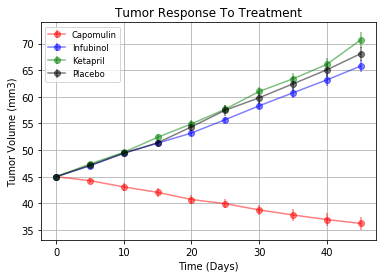

<Figure size 432x288 with 0 Axes>

In [178]:
# Generate the Plot (with Error Bars) each one is a line for a specific drug

plt.errorbar(mean_pivot.index,mean_pivot["Capomulin"],yerr = sem_pivot["Capomulin"], fmt = '-', marker = 'o',color="r",
             alpha = 0.5, label="Capomulin")


plt.errorbar(mean_pivot.index,mean_pivot["Infubinol"],yerr = sem_pivot["Infubinol"], fmt = '-', marker = 'o',color="b",
             alpha = 0.5, label="Infubinol")

plt.errorbar(mean_pivot.index,mean_pivot["Ketapril"],yerr = sem_pivot["Ketapril"], fmt = '-', marker = 'o',color="g",
             alpha = 0.5, label="Ketapril")

plt.errorbar(mean_pivot.index,mean_pivot["Placebo"],yerr = sem_pivot["Placebo"], fmt = '-', marker = 'o',color="k",
             alpha = 0.5, label="Placebo")

plt.xlabel("Time (Days)")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Tumor Response To Treatment")
plt.legend(loc="best", fontsize="small", fancybox=True)
plt.grid()

plt.show()

# Save the Figure ?How to save Image?
plt.savefig("Images/Treatment.png") 


## Metastatic Response to Treatment

In [264]:
# Store the Mean Met. Site Data Grouped by Drug and Timepoint last on tumor volume groupby.(["columns"])  / .sem()["specific column"])
mean_met = combined_data_df.groupby(["Drug", "Timepoint"]).mean()["Metastatic Sites"]

# Convert to DataFrame
mean_met_df = pd.DataFrame({"Metastatic Sites" : mean_met})
# reset index() for pivot table to work
mean_met_df = mean_met_df.reset_index()

# Preview DataFrame
mean_met_df.head()



,Drug,Timepoint,Metastatic Sites
0,Capomulin,0,0.000000
1,Capomulin,5,0.160000
2,Capomulin,10,0.320000
3,Capomulin,15,0.375000
4,Capomulin,20,0.652174


In [208]:
# Store the Standard Error associated with Met. Sites Grouped by Drug and Timepoint groupby.(["columns"])  / .sem()["specific column"])
sem_met = combined_data_df.groupby(['Drug', 'Timepoint']).sem()["Metastatic Sites"]

# Convert to DataFrame
sem_met_df = pd.DataFrame({"Metastatic Sites": sem_met})

# reset index() for pivot table to work
sem_met_df = sem_met_df.reset_index()

# Preview DataFrame
sem_met_df.head()

,Drug,Timepoint,Metastatic Sites
0,Capomulin,0,0.000000
1,Capomulin,5,0.074833
2,Capomulin,10,0.125433
3,Capomulin,15,0.132048
4,Capomulin,20,0.161621


In [210]:
# Minor Data Munging to Re-Format the Data Frames using the .pivot function
# set index , set column header , set data for all columns
mean_met_pivot = mean_met_df.pivot(index='Timepoint', columns="Drug")["Metastatic Sites"]


# Preview that Reformatting worked
mean_met_pivot.head()


Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.160000,0.380952,0.280000,0.304348,0.260870,0.375000,0.320000,0.120000,0.240000,0.166667
10,0.320000,0.600000,0.666667,0.590909,0.523810,0.833333,0.565217,0.250000,0.478261,0.500000
15,0.375000,0.789474,0.904762,0.842105,0.857143,1.250000,0.764706,0.333333,0.782609,0.809524
20,0.652174,1.111111,1.050000,1.210526,1.150000,1.526316,1.000000,0.347826,0.952381,1.294118


In [211]:
# Minor Data Munging to Re-Format the Data Frames using the .pivot function
# set index , set column header , set data for all columns
sem_met_pivot = sem_met_df.pivot(index='Timepoint', columns="Drug")["Metastatic Sites"]


# Preview that Reformatting worked
sem_met_pivot.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.074833,0.108588,0.091652,0.098100,0.093618,0.100947,0.095219,0.066332,0.087178,0.077709
10,0.125433,0.152177,0.159364,0.142018,0.163577,0.115261,0.105690,0.090289,0.123672,0.109109
15,0.132048,0.180625,0.194015,0.191381,0.158651,0.190221,0.136377,0.115261,0.153439,0.111677
20,0.161621,0.241034,0.234801,0.236680,0.181731,0.234064,0.171499,0.119430,0.200905,0.166378


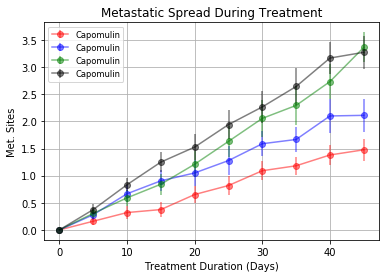

In [225]:
# Generate the Plot (with Error Bars)
plt.errorbar(mean_met_pivot.index,mean_met_pivot["Capomulin"],yerr = sem_met_pivot["Capomulin"], fmt = '-', marker = 'o',color="r",
             alpha = 0.5, label="Capomulin")
    
plt.errorbar(mean_met_pivot.index,mean_met_pivot["Infubinol"],yerr = sem_met_pivot["Infubinol"], fmt = '-', marker = 'o',color="b",
             alpha = 0.5, label="Capomulin")
    
plt.errorbar(mean_met_pivot.index,mean_met_pivot["Ketapril"],yerr = sem_met_pivot["Ketapril"], fmt = '-', marker = 'o',color="g",
             alpha = 0.5, label="Capomulin")

plt.errorbar(mean_met_pivot.index,mean_met_pivot["Placebo"],yerr = sem_met_pivot["Placebo"], fmt = '-', marker = 'o',color="k",
             alpha = 0.5, label="Capomulin")
    
    
    


# set title, labels, legend, grid    
plt.xlabel("Treatment Duration (Days)")
plt.ylabel("Met. Sites")
plt.title("Metastatic Spread During Treatment")
plt.legend(loc="best", fontsize="small", fancybox=True)
plt.grid()

# Save the Figure
plt.savefig("Images/Spread.png") 

# Show the Figure
plt.show()

![Metastatic Spread During Treatment](../Images/spread.png)

## Survival Rates

In [168]:
# Store the Count of Mice Grouped by Drug and Timepoint (W can pass any metric)
count_mouse = combined_data_df.groupby(["Drug","Timepoint"]).count()["Mouse ID"]
# Convert to DataFrame
count_df = pd.DataFrame({"Mouse Count": count_mouse})
count_df = count_df.reset_index()
# Preview DataFrame
count_df.head()

,Drug,Timepoint,Mouse Count
0,Capomulin,0,25
1,Capomulin,5,25
2,Capomulin,10,25
3,Capomulin,15,24
4,Capomulin,20,23


,Drug,Timepoint,Mouse Count
0,Capomulin,0,25
1,Capomulin,5,25
2,Capomulin,10,25
3,Capomulin,15,24
4,Capomulin,20,23


In [226]:
# Minor Data Munging to Re-Format the Data Frames .pivot
count_pivot = count_df.pivot(index='Timepoint', columns="Drug")["Mouse Count"]
# Preview the Data Frame
count_pivot.head()


Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,25,25,25,25,25,25,26,25,26,25
5,25,21,25,23,23,24,25,25,25,24
10,25,20,21,22,21,24,23,24,23,22
15,24,19,21,19,21,20,17,24,23,21
20,23,18,20,19,20,19,17,23,21,17


Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,25,25,25,25,25,25,26,25,26,25
5,25,21,25,23,23,24,25,25,25,24
10,25,20,21,22,21,24,23,24,23,22
15,24,19,21,19,21,20,17,24,23,21
20,23,18,20,19,20,19,17,23,21,17


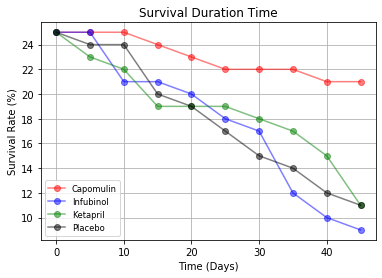

In [231]:
# Generate the Plot (Accounting for percentages)

plt.plot(count_pivot.index,count_pivot["Capomulin"], marker = 'o',color="r",
             alpha = 0.5, label="Capomulin")


plt.plot(count_pivot.index,count_pivot["Infubinol"], marker = 'o',color="b",
             alpha = 0.5, label="Infubinol")

plt.plot(count_pivot.index,count_pivot["Ketapril"], marker = 'o',color="g",
             alpha = 0.5, label="Ketapril")

plt.plot(count_pivot.index,count_pivot["Placebo"], marker = 'o',color="k",
             alpha = 0.5, label="Placebo")



# set title, labels, legend, grid    
plt.xlabel("Time (Days)")
plt.ylabel("Survival Rate (%)")
plt.title("Survival Duration Time")
plt.legend(loc="best", fontsize="small", fancybox=True)
plt.grid()

# Save the Figure
plt.savefig("Images/Survival.png") 

# Show the Figure
plt.show()

![Metastatic Spread During Treatment](../Images/survival.png)

## Summary Bar Graph

In [322]:
# Calculate the percent changes for each drug mean_pivot
Capomulin_percent=(mean_pivot["Capomulin"].iloc[9]-mean_pivot["Capomulin"].iloc[0])/mean_pivot["Capomulin"].iloc[0]*100
# Convert to DataFrame
capomulin_df = Capomulin_percent

# Preview DataFrame
capomulin_df

-19.475302667894173

In [320]:
# Calculate the percent changes for each drug mean_pivot
infubinol_percent=(mean_pivot["Infubinol"].iloc[9]-mean_pivot["Infubinol"].iloc[0])/mean_pivot["Infubinol"].iloc[0]*100
# convert to DataFrame
infubinol_df = infubinol_percent

# Preview Dataframe
infubinol_df

46.12347172785187

In [326]:
# calculate the percent changes for each drug mean_pivot
ketapril_percent =(mean_pivot["Ketapril"].iloc[9]-mean_pivot["Ketapril"].iloc[0])/mean_pivot["Ketapril"].iloc[0]*100

# convert to Dataframe
ketapril_df = ketapril_percent

# Preview DataFrame
ketapril_df

57.028794686606076

In [328]:
# calculate the percent changes for each drug mean_pivot
placebo_percent = (mean_pivot["Placebo"].iloc[9]-mean_pivot["Placebo"].iloc[0])/mean_pivot["Placebo"].iloc[0]*100

# convert to DataFrame

placebo_df = placebo_percent

# Preview DataFrame
placebo_df

51.29796048315153

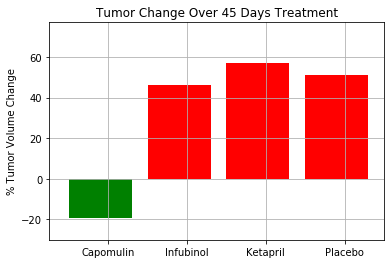

In [339]:
# Store all Relevant Percent Changes into a Tuple

percent_tuple = {'Capomulin' : capomulin_df, 'Infubinol' : infubinol_df, 'Ketapril' : ketapril_df, 'Placebo' : placebo_df}

percentchange_tumor_volume = pd.Series(percent_tuple)

# Index the 4 Drugs
drugs_index = percentchange_tumor_volume.keys()


# Splice the data between passing and failing drugs
summary_bar = plt.subplot()
x_axis = np.arange(0, len(drugs_index))

# Orient widths. Add labels, tick marks, etc. 
tick_locations = []
for x in x_axis:
    tick_locations.append(x + 0.5)
    plt.xticks(tick_locations, drugs_index)
    
colors = []
for value in percentchange_tumor_volume:
    if value >=0 :
        colors.append('r')
    else:
        colors.append('g')
        

# Use functions to label the percentages of changes
percent_change = summary_bar.bar(x_axis, percentchange_tumor_volume, color=colors, align='edge')

# Call functions to implement the function calls
plt.title("Tumor Change Over 45 Days Treatment")
plt.ylabel("% Tumor Volume Change")
plt.xlim(-0.25, len(drugs_index))
plt.ylim(-30, max(percentchange_tumor_volume) +20)
plt.grid()


# Save the Figure
plt.savefig("Images/change.png") 


# Show the Figure
fig.show()

![Metastatic Spread During Treatment](../Images/change.png)

In [333]:
percentchange_tumor_volume

Capomulin   -19.475303
Infubinol    46.123472
Ketapril     57.028795
Placebo      51.297960
dtype: float64

In [337]:
drugs_index

Index(['Capomulin', 'Infubinol', 'Ketapril', 'Placebo'], dtype='object')